In [1]:
#import librares
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
import tensorflow as tf
import splitfolders  
import numpy as np
import pandas as pd
import cv2
import os
import numpy 
from PIL import Image
from sklearn import preprocessing
import random

In [2]:
#dir for dataset
train_dir = "./Dataset/train"
test_dir = "./Dataset/test"

In [3]:
img_size=48

In [4]:
#datagen
train_datagen = ImageDataGenerator(width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [5]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [7]:
import tensorflow as tf
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization

model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

In [8]:
model.compile(
    optimizer = Adam(lr=0.001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

C:\Users\Alexey\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [9]:
epochs = 45
batch_size = 64
history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/45
359/359 [==============================] - 25s 63ms/step - loss: 2.0654 - accuracy: 0.2312 - val_loss: 2.5435 - val_accuracy: 0.2472
Epoch 2/45
359/359 [==============================] - 13s 36ms/step - loss: 1.7396 - accuracy: 0.3257 - val_loss: 1.5283 - val_accuracy: 0.4134
Epoch 3/45
359/359 [==============================] - 13s 36ms/step - loss: 1.5195 - accuracy: 0.4137 - val_loss: 1.3784 - val_accuracy: 0.4623
Epoch 4/45
359/359 [==============================] - 13s 36ms/step - loss: 1.3625 - accuracy: 0.4773 - val_loss: 1.2371 - val_accuracy: 0.5203
Epoch 5/45
359/359 [==============================] - 13s 36ms/step - loss: 1.2701 - accuracy: 0.5149 - val_loss: 1.2337 - val_accuracy: 0.5461
Epoch 6/45
359/359 [==============================] - 13s 36ms/step - loss: 1.2183 - accuracy: 0.5358 - val_loss: 1.1487 - val_accuracy: 0.5740
Epoch 7/45
359/359 [==============================] - 13s 36ms/step - loss: 1.1763 - accuracy: 0.5503 - val_loss: 1.1898 - val_accuracy:

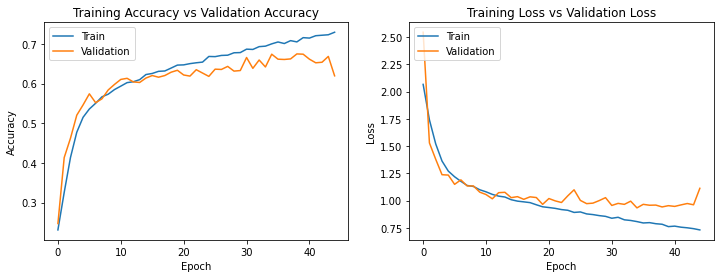

In [10]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [11]:
model.save_weights('model_weights_FER.h5')

In [12]:
from keras.preprocessing import image

(48, 48)


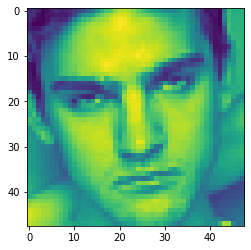

In [13]:
img = image.load_img("C:/Users/Alexey/Documents/datasets/Emotion detection/test/angry/im10.png",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape) #prints (48,48) that is the shape of our image

In [15]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

23/23 [==============================] - 0s 17ms/step - loss: 1.1124 - accuracy: 0.6194
final train accuracy = 74.07 , validation accuracy = 61.94
